In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose
import nibabel as nib
import numpy as np
from tqdm import tqdm
from torchvision.transforms import Compose

In [2]:
# Custom dataset class for handling NIfTI files
class BrainDataset(Dataset):
    def __init__(self, t1w_files, t2w_files, fa_files, adc_files, transform=None):
        self.t1w_files = t1w_files
        self.t2w_files = t2w_files
        self.fa_files = fa_files
        # self.adc_files = adc_files
        self.transform = transform

    def __len__(self):
        return len(self.t1w_files)

    def __getitem__(self, idx):
        t1w_image = nib.load(self.t1w_files[idx]).get_fdata()
        # t1w_image = t1w_image[3:179,5:213,3:179]
        t2w_image = nib.load(self.t2w_files[idx]).get_fdata()
        # t2w_image = t2w_image[3:179,5:213,3:179]
        fa_image = nib.load(self.fa_files[idx]).get_fdata()
        # fa_image = fa_image[3:179,5:213,3:179]
        # adc_image = nib.load(self.adc_files[idx]).get_fdata()

        input_image = np.stack([t1w_image, t2w_image], axis=0)
        # t1w_image = np.stack([t1w_image], axis=0)
        # target_image = np.stack([fa_image, adc_image], axis=0)
        # t2w_image = np.stack([t2w_image], axis=0)
        target_image = np.stack([fa_image], axis=0)

        # if self.transform:
            # input_image = self.transform(input_image)
            # target_image = self.transform(target_image)

        return input_image, target_image
        # return t1w_image, t2w_image, fa_image

In [2]:
pwd

'c:\\Users\\keert\\project2\\final\\code'

In [3]:
import os
from torch.utils.data import DataLoader

os.chdir('../data/output14')

t1w_files = []
t2w_files = []
fa_files = []
adc_files = []

# Loop for patient folders from 000 to 069
for patient_id in range(1,70):
    patient_folder = str(patient_id).zfill(3)
    registered_path = os.path.join(patient_folder, "registered")
    registered2_path = os.path.join(patient_folder, "registered2")
    normalized_path = os.path.join(patient_folder, "normalized")

    try:
        t1w_files.append(os.path.join(normalized_path, "T1w_1mm_normalized.nii.gz"))
        t2w_files.append(os.path.join(registered_path, "T2w_registered.nii.gz"))
        adc_files.append(os.path.join(registered2_path, "ADC_registered.nii.gz"))
        fa_files.append(os.path.join(registered2_path, "FA_registered.nii.gz"))
    except FileNotFoundError:
        print(f"File not found for patient folder: {patient_folder}")

# Loop for patient folders from 111 to 200
for patient_id in range(111, 201):
    if patient_id == 163:
        continue  # Skip patient folder 163
    patient_folder = str(patient_id)
    registered_path = os.path.join(patient_folder, "registered")
    registered2_path = os.path.join(patient_folder, "registered2")
    normalized_path = os.path.join(patient_folder, "normalized")

    try:
        t1w_files.append(os.path.join(normalized_path, "T1w_1mm_normalized.nii.gz"))
        t2w_files.append(os.path.join(registered_path, "T2w_registered.nii.gz"))
        adc_files.append(os.path.join(registered2_path, "ADC_registered.nii.gz"))
        fa_files.append(os.path.join(registered2_path, "FA_registered.nii.gz"))
    except FileNotFoundError:
        print(f"File not found for patient folder: {patient_folder}")

dataset = BrainDataset(
    t1w_files, t2w_files, fa_files, adc_files, transform=Compose([torch.tensor])
)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=1)

# 0 for FA, 1 for ADC
output_modality = 0

# Print t1w files on separate lines
for t1w_file in t1w_files:
    print(t1w_file)

print("Total number of samples:", len(dataset))

# os.chdir('../..')
# os.chdir('./data/input')

# t1w_files = []
# t2w_files = []
# fa_files = []
# adc_files = []

# patient_folders = [folder for folder in os.listdir() if os.path.isdir(folder) and folder.startswith('0')]

# for patient_folder in patient_folders:
#     # registered_path = os.path.join(patient_folder, "registered")
#     # normalized_path = os.path.join(patient_folder, 'normalized')

#     # t1w_files.append(os.path.join(normalized_path, "T1w_1mm_normalized.nii.gz"))
#     # t2w_files.append(os.path.join(registered_path, "T2w_registered.nii.gz"))
#     # adc_files.append(os.path.join(registered_path, "ADC_registered.nii.gz"))
#     # fa_files.append(os.path.join(registered_path, "FA_registered.nii.gz"))

#     path = os.path.join(patient_folder, patient_folder,)

#     t1w_files.append(os.path.join(path, "T1w_1mm.nii.gz"))
#     t2w_files.append(os.path.join(path, "T2w_1mm_noalign.nii.gz"))
#     adc_files.append(os.path.join(path, "ADC_deformed.nii.gz"))
#     fa_files.append(os.path.join(path, "FA_deformed.nii.gz"))

# # dataset = BrainDataset(t1w_files, t2w_files, fa_files, adc_files, transform=Compose([torch.tensor]))
# dataset = BrainDataset(t1w_files, t2w_files, t1w_files, t2w_files, transform=Compose([torch.tensor]))
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True) #, num_workers=2)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # 0 for FA, 1 for ADC
# output_modality = 0

print(t1w_files)

['001\\001\\T1w_1mm.nii.gz', '002\\002\\T1w_1mm.nii.gz', '003\\003\\T1w_1mm.nii.gz', '004\\004\\T1w_1mm.nii.gz']


In [4]:
input_shape = (1, 182, 218, 182)
# input_shape = (1, 176, 208, 176)

num_epochs = 1 # 200

n_filters = 32

in_channels = 2

out_channels = 1

lr = 0.0002

betas = (0.5, 0.999) # beta1 hyperparameter for Adam optimizers

batch_size = 2 # batch size during training

ngpu = 1 # Number of GPUs available. Use 0 for CPU mode.

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [6]:
for inputs, targets in tqdm(dataloader):
    inputs, targets = inputs.to(device), targets.to(device)

    print(inputs.shape)
    print(targets.shape)

 50%|█████     | 1/2 [00:01<00:01,  1.62s/it]

torch.Size([2, 2, 182, 218, 182])
torch.Size([2, 1, 182, 218, 182])


100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

torch.Size([2, 2, 182, 218, 182])
torch.Size([2, 1, 182, 218, 182])


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool3d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        x = self.maxpool_conv(x)
        return x

class Up(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose3d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffZ = x2.size()[2] - x1.size()[2]
        diffY = x2.size()[3] - x1.size()[3]
        diffX = x2.size()[4] - x1.size()[4]
        x1 = F.pad(x1, (diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2, diffZ // 2, diffZ - diffZ // 2))
        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size=1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.conv(x)
        x = self.tanh(x)
        return x

class RegUNet(nn.Module):
    def __init__(self, in_channels, out_channels, n_filters):
        super(RegUNet, self).__init__()

        self.inc = DoubleConv(in_channels, n_filters)
        self.down1 = Down(n_filters, n_filters*2)
        self.down2 = Down(n_filters*2, n_filters*4)
        self.down3 = Down(n_filters*4, n_filters*8)
        self.down4 = Down(n_filters*8, n_filters*16)
        self.up1 = Up(n_filters*16, n_filters*8)
        self.up2 = Up(n_filters*8, n_filters*4)
        self.up3 = Up(n_filters*4, n_filters*2)
        self.up4 = Up(n_filters*2, n_filters)
        self.outc = OutConv(n_filters, out_channels)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return x 

In [15]:
# Define your UNet model and loss function
model = RegUNet(in_channels, out_channels, n_filters).to(device)
criterion = nn.MSELoss()

# keep track of loss
losses = []
iters = 0

torch.cuda.empty_cache()

# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=lr, betas=betas)

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0
    
    # Set model to train mode
    model.train()
    
    # Iterate over batches
    for batch_idx, (inputs, targets) in enumerate(tqdm(dataloader)):
        # Move inputs and targets to device
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # Zero out gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs.float())
        
        # Compute loss
        loss = criterion(outputs, targets.float())
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Update epoch loss
        epoch_loss += loss.item()
        losses.append(loss.item())
    
    # Compute average epoch loss
    epoch_loss /= len(dataloader)
    
    # Print epoch loss
    print('Epoch {} Loss: {:.4f}'.format(epoch+1, epoch_loss))
    torch.save(model.state_dict(), "model.pt")

    torch.cuda.empty_cache()

100%|██████████| 2/2 [05:52<00:00, 176.07s/it]


Epoch 1 Loss: 194037.3281


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


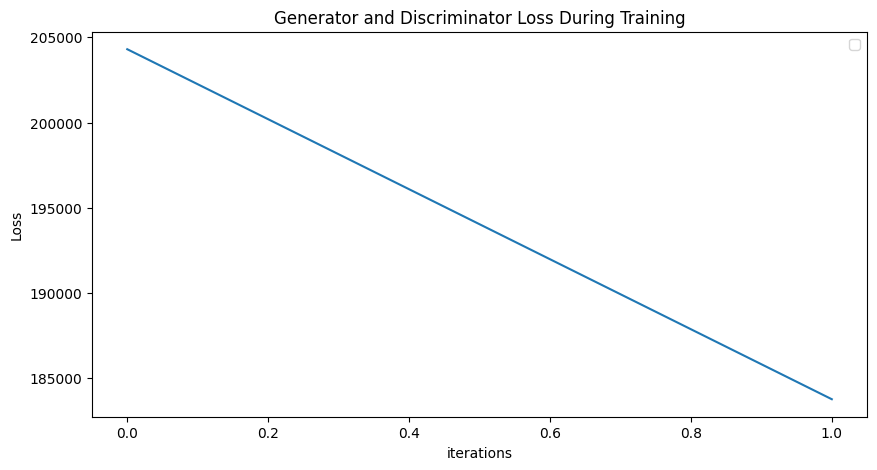

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import os
import torch
import numpy as np
import SimpleITK as sitk
from nilearn import plotting
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F
!pwd

os.chdir('../output14')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the models
model = RegUNet(in_channels, out_channels, n_filters).to(device)

# Load the trained weights
model.load_state_dict(torch.load("model.pt"))

model.eval()

def normalize_image(image):
    # Convert image to floating-point format
    image = image.astype(np.float32)
    
    # Find minimum and maximum pixel values
    min_value = np.min(image)
    max_value = np.max(image)
    
    # Normalize pixel values
    normalized_image = (image - min_value) / (max_value - min_value)
    
    return normalized_image

def generate_img(t1w_path, t2w_path):
    # Load the images as SimpleITK images
    t1w_image_sitk = sitk.ReadImage(t1w_path)
    t2w_image_sitk = sitk.ReadImage(t2w_path)

    # Convert the images to numpy arrays
    t1w_image = sitk.GetArrayFromImage(t1w_image_sitk)
    t2w_image = sitk.GetArrayFromImage(t2w_image_sitk)

    # Convert the images to torch tensors and add a batch dimension
    # t1w_image = t1w_image[3:179, 5:213, 3:179]
    # t2w_image = t2w_image[3:179, 5:213, 3:179]
    input_image = np.stack([t1w_image, t2w_image])
    input_image = torch.from_numpy(input_image).unsqueeze(0).float().to(device)
    # t1w_image = torch.from_numpy(t1w_image).unsqueeze(0).float().to(device)
    # t2w_image = np.stack([t2w_image])
    # t2w_image = torch.from_numpy(t2w_image).unsqueeze(0).float().to(device)

    # t1x1, t1x2, t1x3, t1x4 = t1_model(t1w_image) 
    # t2x1, t2x2, t2x3, t2x4 = t2_model(t2w_image)

    # x4 = torch.cat((t1x4.detach(), t2x4.detach()), 1)
    # x3 = t1x3.detach() + t2x3.detach()
    # x2 = t1x2.detach() + t2x2.detach()
    # x1 = t1x1.detach() + t2x1.detach()

    # generated_image = generator(x1, x2, x3, x4)
    # generated_image = F.pad(generated_image, pad=(3, 3, 5, 5, 3, 3), mode='replicate')

    output_image = model(input_image)
    
    # Create a SimpleITK image from the numpy array
    sitk_image = sitk.GetImageFromArray(generated_image)

    # Define the desired output size
    output_size = (145, 174, 145)

    # Calculate the new spacing
    original_size = sitk_image.GetSize()
    original_spacing = sitk_image.GetSpacing()
    new_spacing = [old_sz*old_spc/new_sz  for old_sz, old_spc, new_sz in zip(original_size, original_spacing, output_size)]

    # Resample the image
    resampler = sitk.ResampleImageFilter()
    resampler.SetSize(output_size)
    resampler.SetOutputSpacing(new_spacing)  # Use the new spacing here
    resampler.SetOutputOrigin(sitk_image.GetOrigin())
    resampler.SetOutputDirection(sitk_image.GetDirection())
    resampled_image = resampler.Execute(sitk_image)

    # Convert the resampled image back to a numpy array
    resampled_array = sitk.GetArrayFromImage(resampled_image)

    return resampled_array

# Call the function with the paths to your T1W and T2W images
synthesized_fa_image = generate_img('../output8/E11/normalized/T1w_1mm_normalized.nii.gz', '../output8/E11/registered/T2w_align.nii.gz')

# Save the synthesized image to a file
sitk.WriteImage(sitk.GetImageFromArray(synthesized_fa_image), 'synthesized_fa_image.nii.gz')

def display_image(input_image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        input_image_file (str): Path to the original NIfTI file.
        output_image_file (str): Path to the skull-stripped NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(input_image_file, title=title, display_mode='ortho')
    plotting.show()

display_image('synthesized_fa_image.nii.gz','Registered')

import nibabel as nib

# Load the NIfTI image
image_path = 'synthesized_fa_image.nii.gz'
image = nib.load(image_path)

# Get the image dimensions
image_shape = image.shape

print("Image dimensions:", image_shape)
print(image)


# Load the NIfTI image
image_path = 'synthesized_fa_image.nii.gz'
image = nib.load(image_path)

# Get the image data as a NumPy array
image_data = image.get_fdata()

# Visualize the image slices
plt.rcParams["figure.figsize"] = (20, 5)

plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, 100], cmap='gray')
plt.title('Generated Image')

plt.subplot(1, 2, 2)
plt.imshow(image_data[105, :, :], cmap='gray')
plt.title('Generated Image')

plt.show()


"""
# visualize output vs actual file
plt.rcParams["figure.figsize"]=20,20
plt.figure()
plt.subplot(1,4,1)
plt.imshow(image[:,:,100])
plt.title('Generated Image')
plt.subplot(1,4,2)
plt.title('Actual Image')
plt.subplot(1,4,3)
plt.imshow(image[105,:,:])
plt.title('Generated Image')
plt.subplot(1,4,4)
plt.title('Actual Image')
plt.show()

"""